In [9]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

from datasets import load_dataset

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from copy import deepcopy

### IRIS dataset

In [5]:
from sklearn import datasets
# from FFNN import NeuralNetwork

iris = datasets.load_iris()

In [6]:
X = iris.data
y = iris.target

In [307]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output=False to return an array

# Fit the encoder and transform the data
one_hot_encoded = encoder.fit_transform(y.reshape(-1,1))
y = one_hot_encoded

In [308]:
X = (X - X.mean()) / X.std()

In [309]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp,test_size=0.5, random_state=0)

In [8]:
nn = NeuralNetwork(num_hidden=3, epochs=10, eta=0.1, alpha=0.9)
nn.fit(X_train,y_train, X_val, y_val)
y_pred = nn.predict(X_test)
np.sum(y_test == y_pred) / len(y_test)

Epoch 1/10, Error: 0.7077599965143377, Avg Weight Change: 0.009522800727795001
Validation Error: 0.46721387247565255
Epoch 2/10, Error: 0.4281231357267058, Avg Weight Change: 0.011805410950470694
Validation Error: 0.3809817313513598
Epoch 3/10, Error: 0.3913807904118421, Avg Weight Change: 0.015293273988270434
Validation Error: 0.4360034484639339
Epoch 4/10, Error: 0.28258342542829706, Avg Weight Change: 0.009941821757663684
Validation Error: 0.24863077953525006
Epoch 5/10, Error: 0.2649657152733877, Avg Weight Change: 0.013162575542316266
Validation Error: 0.25268950577169413
Epoch 6/10, Error: 0.2236814964990248, Avg Weight Change: 0.01123291563336782
Validation Error: 0.10815144681801914
Epoch 7/10, Error: 0.23672065924714253, Avg Weight Change: 0.012519272748209298
Validation Error: 0.34058417727549306
Epoch 8/10, Error: 0.18326974108785093, Avg Weight Change: 0.007911441155055696
Validation Error: 0.15166611049757253
Epoch 9/10, Error: 0.16486959967463574, Avg Weight Change: 0.006

0.0

In [9]:
y_pred = nn.predict(X_val)
np.sum(y_val == y_pred) / len(y_val)

0.0

In [10]:
y_pred = nn.predict(X_temp)
np.sum(y_temp == y_pred) / len(y_temp)

0.0

In [11]:
nn = NeuralNetwork(num_hidden=17, epochs=10, eta=0.1, alpha=0.9, output_activation='sigmoid')
nn.fit(X_train,y_train, X_val, y_val)
y_pred = nn.predict(X_test)
np.sum(y_test == y_pred) / len(y_test)

Epoch 1/10, Error: 1.5226345972913529, Avg Weight Change: 0.0022912405431206396
Validation Error: 1.2259090748242487
Epoch 2/10, Error: 1.0495599766763561, Avg Weight Change: 0.002105500299059709
Validation Error: 1.0404997489407224
Epoch 3/10, Error: 0.9233967872012191, Avg Weight Change: 0.0020284698646844974
Validation Error: 0.9181672881447198
Epoch 4/10, Error: 0.8553960840608136, Avg Weight Change: 0.0020444901474568327
Validation Error: 0.8417550663768073
Epoch 5/10, Error: 0.7961748254551996, Avg Weight Change: 0.0021549793680055935
Validation Error: 0.7760765826965778
Epoch 6/10, Error: 0.7270162108595113, Avg Weight Change: 0.0023311021504926425
Validation Error: 0.7576182566729238
Epoch 7/10, Error: 0.6328244221678389, Avg Weight Change: 0.0020834035940661077
Validation Error: 0.5694867740885848
Epoch 8/10, Error: 0.5134030574298345, Avg Weight Change: 0.0017716368523503895
Validation Error: 0.4881348086353215
Epoch 9/10, Error: 0.46514628333048086, Avg Weight Change: 0.0016

0.0

In [12]:
y_pred = nn.predict(X_val)
np.sum(y_val == y_pred) / len(y_val)

0.0

In [13]:
y_pred = nn.predict(X_temp)
np.sum(y_temp == y_pred) / len(y_temp)

0.0

### Alzheimer classification

In [269]:
dataset = load_dataset('Falah/Alzheimer_MRI', split='train')
test = load_dataset('Falah/Alzheimer_MRI', split='test')

In [303]:
images = []
labels = []

for i in dataset:
    images += [np.array(i["image"])]
    labels += [i["label"]]

for i in test:
    images += [np.array(i["image"])]
    labels += [i["label"]]

images = np.array(images)
labels = np.array(labels)

In [304]:
images = images/255

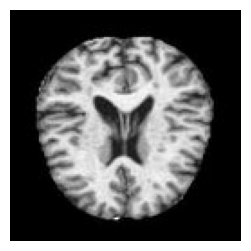

In [305]:
fig = plt.figure(figsize= (4,3))
plt.imshow(images[0], cmap='gray')
_ = plt.axis('off')

In [293]:
images = images.reshape(6400, -1)

In [294]:
X_train, X_temp, y_train, y_temp = train_test_split(images,labels,test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp,test_size=0.5, random_state=0)

In [299]:
nn = NeuralNetwork(num_hidden=10, epochs=5, eta=0.1, alpha=0.9)
nn.fit(X_train,y_train, X_val, y_val)
y_pred = nn.predict(X_test)
np.sum(y_test == y_pred) / len(y_test)

Epoch 1/5, Error: 1.0851501859470378
Validation Error: 1.094615050474826
Epoch 2/5, Error: 1.0736252895850718
Validation Error: 1.0904974434279553
Epoch 3/5, Error: 1.0713783617195378
Validation Error: 1.1114656111594319
Early stopping at epoch 3. Best epoch was 2


0.5260416666666666

### MNIST

In [610]:
from sklearn.datasets import fetch_openml
X,y= fetch_openml('mnist_784',version=1,return_X_y=True)

In [611]:
X = X.to_numpy()
y = y.to_numpy()

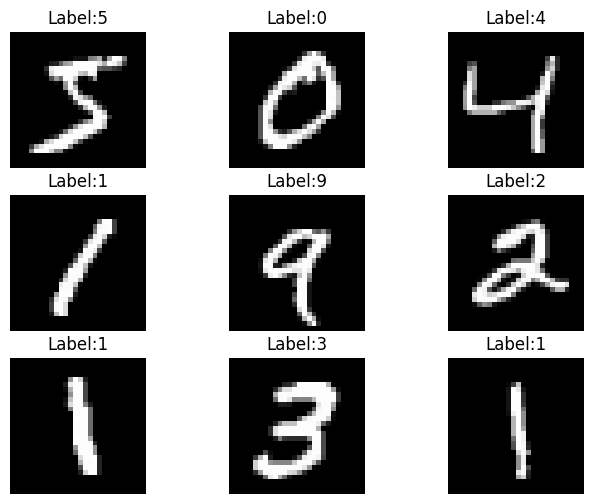

In [612]:
num_images = 9 # Choose a square number
factor = int(np.sqrt(num_images))
fig,ax = plt.subplots(nrows=factor,ncols=factor,figsize=(8,6))
idx_offset = 0 # take "num_images" starting from the index "idx_offset"
for i in range(factor):
  index = idx_offset+i*(factor)
  for j in range(factor):
    ax[i,j].imshow(X[index+j].reshape(28,28),cmap='gray')
    ax[i,j].set_title('Label:{0}'.format(str(y[index+j])))
    ax[i,j].set_axis_off()

In [613]:
X = X/255

In [614]:
y = y.astype(int)

In [615]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp,test_size=0.5, random_state=0)

In [616]:
nn = NeuralNetwork(num_hidden=88, epochs=10, eta=0.1, alpha=0.9)
nn.fit(X_train,y_train, X_val, y_val)
y_pred = nn.predict(X_test)
np.sum(y_test == y_pred) / len(y_test)

Epoch 1/10, Error: nan, Avg Weight Change: nan
Validation Error: nan
Epoch 2/10, Error: nan, Avg Weight Change: nan
Validation Error: nan


KeyboardInterrupt: 

### Chinese MNIST

In [11]:
df = pd.read_csv('data/chineseMNIST.csv')
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,label,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,八
14996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,八
14997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,八
14998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,八


In [12]:
df.groupby(["label","character"]).size()

label      character
0          零            1000
1          一            1000
2          二            1000
3          三            1000
4          四            1000
5          五            1000
6          六            1000
7          七            1000
8          八            1000
9          九            1000
10         十            1000
100        百            1000
1000       千            1000
10000      万            1000
100000000  亿            1000
dtype: int64

In [13]:
dataset_shuffled = df.sample(frac=1, random_state=0)

In [14]:
X =dataset_shuffled.iloc[:,0:4096]
X = np.asarray(X)
labels =dataset_shuffled.iloc[:,4096:4098]
y = labels.iloc[:,0]

In [15]:
X.shape

(15000, 4096)

In [16]:
np.unique(X)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [17]:
X = X / 255
np.unique(X)

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.28235294, 0.28627451, 0.29019

In [18]:
X = X.reshape(15000, -1)
y = np.asarray(y).flatten()
np.unique(y)

array([        0,         1,         2,         3,         4,         5,
               6,         7,         8,         9,        10,       100,
            1000,     10000, 100000000], dtype=int64)

In [19]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output=False to return an array

# Fit the encoder and transform the data
one_hot_encoded = encoder.fit_transform(y.reshape(-1,1))
y = one_hot_encoded

In [20]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp,test_size=0.5, random_state=0)

In [21]:
from StochasticGradientDescent import SGD

sgd = SGD(num_hidden=248, epochs=10, eta=0.01, alpha=0.9, reg_parameter=0.01)
sgd.fit(X_train,y_train, X_val, y_val)

KeyboardInterrupt: 

In [673]:
y_test_values = encoder.inverse_transform(y_test).reshape(-1)
y_train_values = encoder.inverse_transform(y_train).reshape(-1)
y_val_values = encoder.inverse_transform(y_val).reshape(-1)

In [674]:
y_pred = nn.predict(X_test)
np.sum(y_test_values == y_pred.argmax(axis=1)) / len(y_test_values)

0.5751111111111111

In [675]:
y_pred = nn.predict(X_train)
np.sum(y_train_values == y_pred.argmax(axis=1)) / len(y_train_values)

0.7311428571428571

### Tensorflow of Chinese MNIST

In [307]:
# Import the libraries
import numpy as np
import tensorflow as tf

# We can import the methods we will use directly, or call them from tf.
# We will be using fully-connected layers called Dense layers
from tensorflow.keras.layers import Input, Dense
# This is the sequential model API
from tensorflow.keras import Sequential
# This is used for the functional model API
from tensorflow.keras import Model

# Further methods required
# To change the class label to dummy variables
from tensorflow.keras.utils import to_categorical
# The data is stored in Tensorflow already
from tensorflow.keras.datasets import mnist

# For graphics
import matplotlib.pyplot as plt

In [308]:
X_train = tf.cast(X_train, dtype='float32')
X_test = tf.cast(X_test, dtype='float32')
X_val = tf.cast(X_val, dtype='float32')

y_train = tf.cast(y_train, 'int32')
y_test = tf.cast(y_test, 'int32')
y_val = tf.cast(y_val, 'int32')

In [309]:
input_shape = (4096,)
K1 = 248
Kout = 15

In [310]:
# Initialise a sequential model
model_sequential = Sequential()

# Adding layers using the add() method of the Sequential model class - 
# here we add the input layer.
model_sequential.add(
    # Add the Input layer. Note this is the tensorflow.keras.layers.Input
    Input(shape = input_shape, name='input_layer')
)

In [311]:
model_sequential.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [312]:
# Add the first hidden layer
model_sequential.add(
    Dense(units=K1, activation='sigmoid', name='hidden_1')
)

model_sequential.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                     │ (None, 248)                 │       1,016,056 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,016,056 (3.88 MB)

 Trainable params: 1,016,056 (3.88 MB)

 Non-trainable params: 0 (0.00 B)

In [313]:
#Adding output layer
model_sequential.add(
    Dense(Kout, activation='softmax', name='output_layer')
)

model_sequential.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                     │ (None, 248)                 │       1,016,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 15)                  │           3,735 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,019,791 (3.89 MB)

 Trainable params: 1,019,791 (3.89 MB)

 Non-trainable params: 0 (0.00 B)

In [314]:
temp_model = Sequential(
    [
        Input(shape=(4096,)),
        Dense(units=K1, activation='sigmoid', name='hidden_1'),
        Dense(units=Kout, activation='softmax', name='output_layer')
    ]
)

temp_model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                     │ (None, 248)                 │       1,016,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 15)                  │           3,735 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,019,791 (3.89 MB)

 Trainable params: 1,019,791 (3.89 MB)

 Non-trainable params: 0 (0.00 B)

In [315]:
input_layer = Input(shape=(4096,))
x = Dense(units=K1, activation='sigmoid', name='hidden_1')(input_layer)
output_layer = Dense(units=Kout, activation='softmax', name='output_layer')(x)

model_functional = Model(inputs = input_layer, outputs = output_layer)

In [316]:
model_functional.summary()

Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)          │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_1 (Dense)                     │ (None, 248)                 │       1,016,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 15)                  │           3,735 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,019,791 (3.89 MB)

 Trainable params: 1,019,791 (3.89 MB)

 Non-trainable params: 0 (0.00 B)

In [317]:
model_functional.layers

[<InputLayer name=input_layer_20, built=True>,
 <Dense name=hidden_1, built=True>,
 <Dense name=output_layer, built=True>]

In [318]:
last_weight_matrix, last_bias_vector = model_functional.layers[-1].get_weights()

In [319]:
# Use the SGD optimizer with the custom learning rate and momentum
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)

model_functional.compile(optimizer=optimizer, 
                         loss='categorical_crossentropy', 
                         metrics=['acc'])
history = model_functional.fit(x=X_train,
                               y=y_train,
                               epochs=100,
                               validation_data=(X_val, y_val),
                               verbose=1)

Epoch 1/25
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc: 0.1405 - loss: 2.8066 - val_acc: 0.3529 - val_loss: 2.0376
Epoch 2/25
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.3989 - loss: 1.9066 - val_acc: 0.4222 - val_loss: 1.8044
Epoch 3/25
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.4808 - loss: 1.6806 - val_acc: 0.4338 - val_loss: 1.7960
Epoch 4/25
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.5312 - loss: 1.5407 - val_acc: 0.5049 - val_loss: 1.5625
Epoch 5/25
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.5780 - loss: 1.3781 - val_acc: 0.5520 - val_loss: 1.4322
Epoch 6/25
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.6319 - loss: 1.1954 - val_acc: 0.5689 - val_loss: 1.3545
Epoch 7/25
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.6855 - loss: 1.0438 - val_acc: 0.6000 - val_loss: 1.2486
Epoch 8/25
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.7322 - loss: 0.8781 - val_acc: 0.6400 - val_loss: 1.1781
Epoch 9/25
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

### Body Performance dataset

In [329]:
body_performance = pd.read_csv("data/bodyPerformance.csv")
body_performance.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [330]:
body_performance.isna().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [331]:
body_performance['class'].value_counts()

class
C    3349
D    3349
A    3348
B    3347
Name: count, dtype: int64

In [332]:
# Create a mapping from gender to numeric values
gender_mapping = {'M': 0, 'F': 1}

body_performance['gender'] = body_performance['gender'].map(gender_mapping)
body_performance

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [333]:
((body_performance['age'] - body_performance['age'].mean()) / body_performance['age'].std())

0       -0.717405
1       -0.864187
2       -0.423841
3       -0.350450
4       -0.644014
           ...   
13388   -0.864187
13389   -1.157752
13390    0.163287
13391    1.998064
13392   -0.203668
Name: age, Length: 13393, dtype: float64

In [334]:
body_performance_categorical = body_performance[['gender', 'class']]
body_performance_numeric = body_performance.drop(['gender', 'class'], axis=1)
body_performance_numeric.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0


In [335]:
body_performance_scaled = (body_performance_numeric - body_performance_numeric.mean()) / body_performance_numeric.std()
body_performance_scaled.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,-0.717405,0.443856,0.652126,-0.267357,0.112005,-0.015959,1.688127,0.377303,1.416909,0.673983
1,-0.864187,-0.422450,-0.974698,-1.039042,-0.167272,-0.287810,-0.053071,0.128979,0.926599,0.974977
2,-0.423841,1.310163,0.883094,-0.432718,1.229112,1.479221,0.737527,-0.379495,0.646422,-0.228996
3,-0.350450,0.704935,0.305672,-0.666979,-0.260364,1.139407,0.417523,-0.001096,0.926599,0.724149
4,-0.644014,0.621865,0.021146,-0.846121,-0.818918,-0.219847,0.615172,1.406076,0.366245,0.673983


In [336]:
body_performance_final = pd.concat((body_performance_scaled, body_performance_categorical), axis=1)
body_performance_final

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,gender,class
0,-0.717405,0.443856,0.652126,-0.267357,0.112005,-0.015959,1.688127,0.377303,1.416909,0.673983,0,C
1,-0.864187,-0.422450,-0.974698,-1.039042,-0.167272,-0.287810,-0.053071,0.128979,0.926599,0.974977,0,A
2,-0.423841,1.310163,0.883094,-0.432718,1.229112,1.479221,0.737527,-0.379495,0.646422,-0.228996,0,C
3,-0.350450,0.704935,0.305672,-0.666979,-0.260364,1.139407,0.417523,-0.001096,0.926599,0.724149,0,B
4,-0.644014,0.621865,0.021146,-0.846121,-0.818918,-0.219847,0.615172,1.406076,0.366245,0.673983,0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,-0.864187,0.420122,0.364252,-0.970141,-0.446549,0.731631,-0.109543,0.259053,0.506334,0.197411,0,C
13389,-1.157752,1.322030,-0.296855,-1.535125,-0.446549,-0.151884,-0.373076,-1.668418,0.576378,-0.580155,0,D
13390,0.163287,1.025350,1.092305,-0.432718,-0.074180,0.119967,2.497549,0.140804,0.366245,0.974977,0,A
13391,1.998064,-2.665352,-0.815698,2.364642,-1.005102,-0.627623,-1.662504,-0.710595,-2.785744,-2.887770,1,D


In [337]:
X = body_performance_final.drop('class', axis=1)
y = body_performance_final['class']
y = np.asarray(y)

In [338]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output=False to return an array

# Fit the encoder and transform the data
one_hot_encoded = encoder.fit_transform(y.reshape(-1,1))
y = one_hot_encoded

In [339]:
X_train, X_temp, y_train, y_temp = train_test_split(np.asarray(X),y,test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp,test_size=0.25, random_state=0)

In [142]:
from FFNN import NeuralNetwork

nn = NeuralNetwork(num_hidden=7, epochs=100, eta=0.01, alpha=0.1)
nn.fit(X_train,y_train, X_val, y_val)

Epoch 1/100, Error: 0.9361712754030452, Avg Weight Change: 0.0012590953607195885
Validation Error: 0.8660260689321262
Epoch 2/100, Error: 0.8467635602581058, Avg Weight Change: 0.0014204791488670902
Validation Error: 0.8058926663928194
Epoch 3/100, Error: 0.8117348568201567, Avg Weight Change: 0.0014159425138192444
Validation Error: 0.7939555540024391
Epoch 4/100, Error: 0.7841259918718281, Avg Weight Change: 0.0013867087971146297
Validation Error: 0.7844119180746383
Epoch 5/100, Error: 0.7637334371899301, Avg Weight Change: 0.001354113874356569
Validation Error: 0.7604236787954465
Epoch 6/100, Error: 0.7487079794458195, Avg Weight Change: 0.0013210110724164834
Validation Error: 0.7355424495025594
Epoch 7/100, Error: 0.7403867934561856, Avg Weight Change: 0.0013056465745472936
Validation Error: 0.7391342807144757
Epoch 8/100, Error: 0.7375531501613602, Avg Weight Change: 0.0013082518234724051
Validation Error: 0.7213395367575061
Epoch 9/100, Error: 0.7288068955827927, Avg Weight Change

In [143]:
y_pred = nn.predict(X_test)
np.sum(y_test.argmax(axis=1) == y_pred.argmax(axis=1)) / len(y_test)

0.7144278606965174

In [144]:
y_pred = nn.predict(X_train)
np.sum(y_train.argmax(axis=1) == y_pred.argmax(axis=1)) / len(y_train)

0.69632

In [ ]:
X_train = tf.cast(X_train, dtype='float32')
X_test = tf.cast(X_test, dtype='float32')
X_val = tf.cast(X_val, dtype='float32')

y_train = tf.cast(y_train, 'int32')
y_test = tf.cast(y_test, 'int32')
y_val = tf.cast(y_val, 'int32')

In [ ]:
input_shape = (11,)
K1 = 7
Kout = 4

In [ ]:
# Initialise a sequential model
model_sequential = Sequential()

# Adding layers using the add() method of the Sequential model class - 
# here we add the input layer.
model_sequential.add(
    # Add the Input layer. Note this is the tensorflow.keras.layers.Input
    Input(shape = input_shape, name='input_layer')
)

In [ ]:
model_sequential.summary()

In [ ]:
# Add the first hidden layer
model_sequential.add(
    Dense(units=K1, activation='sigmoid', name='hidden_1')
)

model_sequential.summary()

In [ ]:
#Adding output layer
model_sequential.add(
    Dense(Kout, activation='softmax', name='output_layer')
)

model_sequential.summary()

In [ ]:
temp_model = Sequential(
    [
        Input(shape=(11,)),
        Dense(units=K1, activation='sigmoid', name='hidden_1'),
        Dense(units=Kout, activation='softmax', name='output_layer')
    ]
)

temp_model.summary()

In [ ]:
input_layer = Input(shape=(11,))
x = Dense(units=K1, activation='sigmoid', name='hidden_1')(input_layer)
output_layer = Dense(units=Kout, activation='softmax', name='output_layer')(x)

model_functional = Model(inputs = input_layer, outputs = output_layer)

In [ ]:
model_functional.summary()

In [ ]:
last_weight_matrix, last_bias_vector = model_functional.layers[-1].get_weights()

In [ ]:
# Use the SGD optimizer with the custom learning rate and momentum
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.5)

model_functional.compile(optimizer=optimizer, 
                         loss='categorical_crossentropy', 
                         metrics=['acc'])
history = model_functional.fit(x=X_train,
                               y=y_train,
                               epochs=25,
                               validation_data=(X_val, y_val),
                               verbose=1)

## SCG

In [50]:
from ScaledConjugateGradient import SCG

scg = SCG(num_hidden=100, bias=-1, max_iter=10000,random_state=0,reg_parameter=0.003)
scg.fit(X_train, y_train, X_temp, y_temp)

Training error is: 2.7012704383674175 and validation error is: 2.7131102983678104
Training error is: 2.63194002384875 and validation error is: 2.6471351840635595
Training error is: 2.5451639639104155 and validation error is: 2.5598013934539425
Training error is: 2.3599046404531836 and validation error is: 2.3755726911410346
Training error is: 2.256902255731156 and validation error is: 2.3032404249826652
Training error is: 2.2126111983579517 and validation error is: 2.269322647365357
Training error is: 2.1783323151026885 and validation error is: 2.2227656860060128
Training error is: 2.1511676778289743 and validation error is: 2.1946085217285107
Training error is: 2.1120342491640516 and validation error is: 2.1697790762586107
Training error is: 2.066311922159298 and validation error is: 2.1254682252342656
Training error is: 2.0398242139349376 and validation error is: 2.085983280349753
Training error is: 1.9933823093408694 and validation error is: 2.038740820876777
Training error is: 1.95

KeyboardInterrupt: 

In [ ]:
y_pred = np.argmax(scg.predict(X_test), axis=1)
np.sum((y_pred == np.argmax(y_test, axis=1))) / len(y_pred)

In [42]:
y_pred = np.argmax(scg.predict(X_train), axis=1)
np.sum((y_pred == np.argmax(y_train, axis=1))) / len(y_pred)

0.7782857142857142

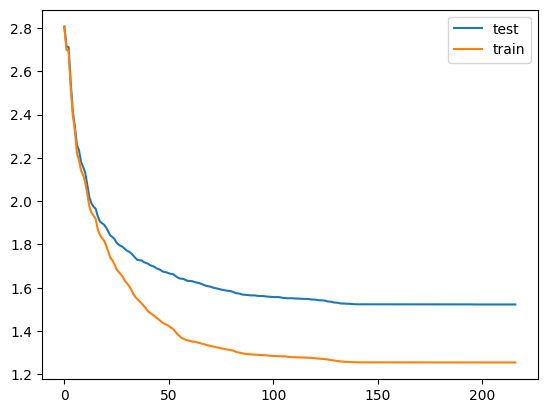

In [46]:
plt.figure()

plt.plot(np.asarray(scg.validation_error))
plt.plot(np.asarray(scg.training_error))

plt.legend(['test', 'train'])
plt.show()

## Leap Frog

In [51]:
from LeapFrog import LFrog

lf = LFrog(num_hidden=248,random_state=0,reg_parameter=0.003)
lf.fit(X_train, y_train, X_val, y_val)

Training error is: 2.840188390602383 and validation error is: 2.8421111012422173
Training error is: 2.8387653046072634 and validation error is: 2.840816697916776
Training error is: 2.8364470192844724 and validation error is: 2.8387111721805534
Training error is: 2.8332889860397152 and validation error is: 2.835841517323864
Training error is: 2.8293196744225426 and validation error is: 2.8322320326070614
Training error is: 2.824498385683244 and validation error is: 2.8278366344431043
Training error is: 2.8186881229220604 and validation error is: 2.8225095856495703
Training error is: 2.8116694877942403 and validation error is: 2.816042848395084
Training error is: 2.803144870521207 and validation error is: 2.808129509938587
Training error is: 2.7927575533574087 and validation error is: 2.798425743433132
Training error is: 2.7801093775426304 and validation error is: 2.7865251637860515
Training error is: 2.7648018004502153 and validation error is: 2.772028051508418
Training error is: 2.7464

KeyboardInterrupt: 

In [52]:
y_pred = np.argmax(lf.predict(X_test), axis=1)
np.sum((y_pred == np.argmax(y_test, axis=1))) / len(y_pred)

0.7835555555555556

In [53]:
y_pred = np.argmax(lf.predict(X_train), axis=1)
np.sum((y_pred == np.argmax(y_train, axis=1))) / len(y_pred)

0.909047619047619

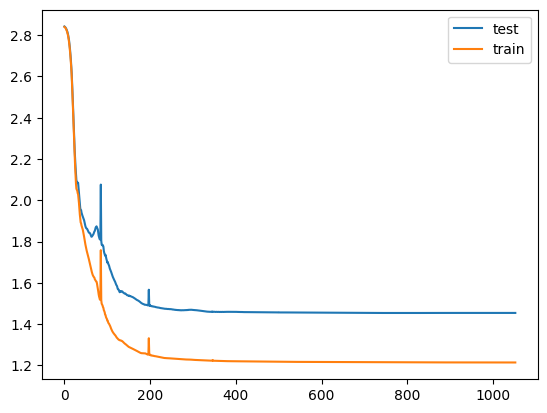

In [54]:
plt.figure()

plt.plot(np.asarray(lf.validation_error))
plt.plot(np.asarray(lf.training_error))

plt.legend(['test', 'train'])
plt.show()

In [84]:
def generate_regression_data(n, scale=0.25, seed=4433):
    np.random.seed(seed)
    x = np.random.uniform(-10,10,(n,))
    err = np.random.normal(0., scale, (n,))
    y = 0.2*x**3 + 0.8*x**2 + 1 + err
    
    mux = np.mean(x)
    muy = np.mean(y)
    sigx = np.std(x)
    sigy = np.std(y)
    x = (x-mux)/sigx
    y = (y-muy)/sigy
    return x,y

In [85]:
x,y = generate_regression_data(5000)

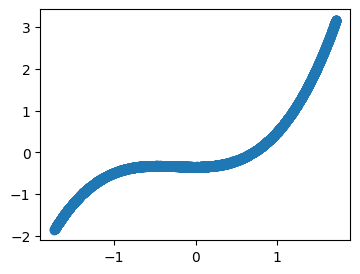

In [86]:
plt.figure(figsize=(4,3))
plt.scatter(x,y)
plt.show()

In [87]:
print(f'Current shape:\nx = {x.shape}\ny = {y.shape}')
x = x.reshape(-1,1)
y = y.reshape(-1,1)
print(f'New shape:\nx = {x.shape}\ny = {y.shape}')

Current shape:
x = (5000,)
y = (5000,)
New shape:
x = (5000, 1)
y = (5000, 1)


In [88]:
from LeapFrog import LFrog

lf = LFrog(num_hidden=256, output_activation='linear', random_state=0)
lf.fit(x, y, x, y)

Training error is: 1.0098174089468244 and validation error is: 1.0098174089468244
Training error is: 1.008561291313025 and validation error is: 1.008561291313025
Training error is: 1.0065751782716787 and validation error is: 1.0065751782716787
Training error is: 1.0040382208469127 and validation error is: 1.0040382208469127
Training error is: 1.0014455343173347 and validation error is: 1.0014455343173347
Training error is: 1.0 and validation error is: 1.0
Training error is: 1.0 and validation error is: 1.0
Training error is: 1.0 and validation error is: 1.0
Training error is: 1.0 and validation error is: 1.0
Training error is: 1.0 and validation error is: 1.0
Training error is: 1.0 and validation error is: 1.0
Training error is: 1.0013090428880473 and validation error is: 1.0013090428880473
Training error is: 0.9953620570810353 and validation error is: 0.9953620570810353
Training error is: 0.9427471675300286 and validation error is: 0.9427471675300286
Training error is: 0.8896694322257

In [89]:
xseq = np.linspace(x.min()-1e-02, x.max()+1e-02, 100)
yseq = lf.predict(xseq.reshape(-1,1))

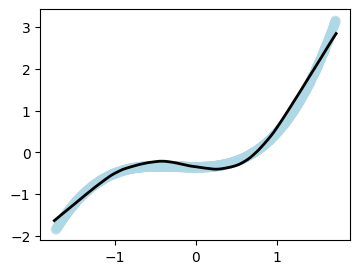

In [90]:
plt.figure(figsize=(4,3))
plt.scatter(x,y,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()

In [91]:
from ScaledConjugateGradient import SCG

scg = SCG(num_hidden=256, output_activation='linear', random_state=0)
scg.fit(x, y, x, y)

Training error is: 0.686230561056843 and validation error is: 0.686230561056843
Training error is: 0.6107309815444594 and validation error is: 0.6107309815444594
Training error is: 0.5323459949825884 and validation error is: 0.5323459949825884
Training error is: 0.5169648088986016 and validation error is: 0.5169648088986016
Training error is: 0.5137272853484306 and validation error is: 0.5137272853484306
Training error is: 0.509009064930005 and validation error is: 0.509009064930005
Training error is: 0.509009064930005 and validation error is: 0.509009064930005
Training error is: 0.509009064930005 and validation error is: 0.509009064930005
Training error is: 0.509009064930005 and validation error is: 0.509009064930005
Training error is: 0.509009064930005 and validation error is: 0.509009064930005
Training error is: 0.509009064930005 and validation error is: 0.509009064930005
Training error is: 0.509009064930005 and validation error is: 0.509009064930005
Training error is: 0.50900906493

In [92]:
xseq = np.linspace(x.min()-1e-02, x.max()+1e-02, 100)
yseq = scg.predict(xseq.reshape(-1,1))

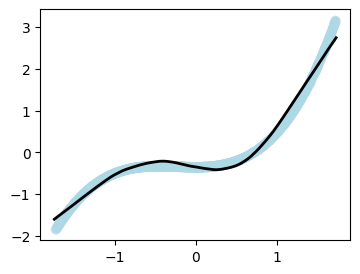

In [93]:
plt.figure(figsize=(4,3))
plt.scatter(x,y,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()

In [94]:
from StochasticGradientDescent import SGD

sgd = SGD(num_hidden=256, epochs=100, output_activation='linear', random_state=0)
sgd.fit(x, y, x, y)

Epoch 1/100, Error: nan, Avg Weight Change: nan
Validation Error: nan
Epoch 2/100, Error: nan, Avg Weight Change: nan
Validation Error: nan
Epoch 3/100, Error: nan, Avg Weight Change: nan
Validation Error: nan
Epoch 4/100, Error: nan, Avg Weight Change: nan
Validation Error: nan
Epoch 5/100, Error: nan, Avg Weight Change: nan
Validation Error: nan
Epoch 6/100, Error: nan, Avg Weight Change: nan
Validation Error: nan
Epoch 7/100, Error: nan, Avg Weight Change: nan
Validation Error: nan
Epoch 8/100, Error: nan, Avg Weight Change: nan
Validation Error: nan
Epoch 9/100, Error: nan, Avg Weight Change: nan
Validation Error: nan
Epoch 10/100, Error: nan, Avg Weight Change: nan
Validation Error: nan
Epoch 11/100, Error: nan, Avg Weight Change: nan
Validation Error: nan
Epoch 12/100, Error: nan, Avg Weight Change: nan
Validation Error: nan
Epoch 13/100, Error: nan, Avg Weight Change: nan
Validation Error: nan
Epoch 14/100, Error: nan, Avg Weight Change: nan
Validation Error: nan
Epoch 15/100, E

In [95]:
xseq = np.linspace(x.min()-1e-02, x.max()+1e-02, 100)
yseq = sgd.predict(xseq.reshape(-1,1))

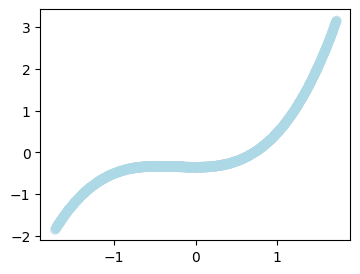

In [96]:
plt.figure(figsize=(4,3))
plt.scatter(x,y,color='lightblue',alpha=0.1)
plt.plot(xseq, yseq.ravel(), color='black', linewidth=2.0)
plt.show()